
 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

i =  1
R-squared test score: 0.660
i =  2
R-squared test score: 0.711
i =  3
R-squared test score: 0.686
i =  4
R-squared test score: 0.709
i =  5
R-squared test score: 0.722
i =  6
R-squared test score: 0.669
i =  7
R-squared test score: 0.666
i =  8
R-squared test score: 0.688
i =  9
R-squared test score: 0.713
i =  10
R-squared test score: 0.701
i =  11
R-squared test score: 0.722
i =  12
R-squared test score: 0.658
i =  13
R-squared test score: 0.699
i =  14
R-squared test score: 0.673
i =  15
R-squared test score: 0.671
i =  16
R-squared test score: 0.684
i =  17
R-squared test score: 0.676
i =  18
R-squared test score: 0.701
i =  19
R-squared test score: 0.692
i =  20
R-squared test score: 0.692
i =  21
R-squared test score: 0.724
i =  22
R-squared test score: 0.679
i =  23
R-squared test score: 0.720
i =  24
R-squared test score: 0

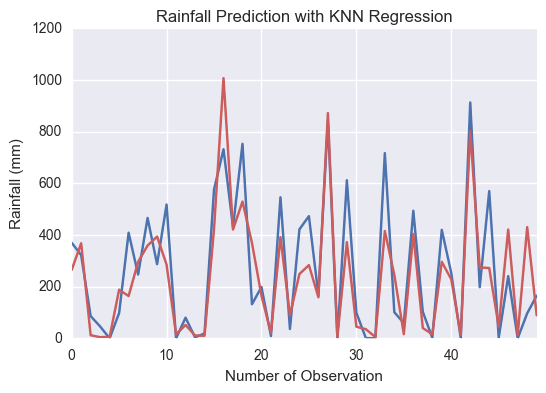

In [12]:
# KNN regression - 1 
# applied in Bangladesh rainfall data

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import warnings; warnings.simplefilter('ignore') # Jupyter notebook warning message remove

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#dataset=dataset.fillna(0)

#dataset['Month_Total']=dataset.iloc[:,5:].sum(axis=1)

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking careof categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

#y=y.astype(int)

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = i)
    
    neigh = KNeighborsRegressor(n_neighbors=8)
    neigh.fit(X_train,y_train)

    predicted = neigh.predict(X_test)
    #print("Prediction Result: ",predicted)
    print("i = ",i)
    print('R-squared test score: {:.3f}'.format(neigh.score(X_test,y_test))) # R-Squared test score

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.tsplot(y_test[0:50])
sns.tsplot(predicted[0:50],color="indianred")
plt.xlabel('Number of Observation')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction with KNN Regression')
plt.show()


 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

i =  1
R-squared test score: 0.329
i =  2
R-squared test score: 0.394
i =  3
R-squared test score: 0.492
i =  4
R-squared test score: 0.513
i =  5
R-squared test score: 0.388
i =  6
R-squared test score: 0.468
i =  7
R-squared test score: 0.547
i =  8
R-squared test score: 0.514
i =  9
R-squared test score: 0.471
i =  10
R-squared test score: 0.470
i =  11
R-squared test score: 0.484
i =  12
R-squared test score: 0.613
i =  13
R-squared test score: 0.473
i =  14
R-squared test score: 0.668
i =  15
R-squared test score: 0.011
i =  16
R-squared test score: 0.347
i =  17
R-squared test score: 0.500
i =  18
R-squared test score: 0.450
i =  19
R-squared test score: 0.575
i =  20
R-squared test score: 0.544
i =  21
R-squared test score: 0.449
i =  22
R-squared test score: 0.585
i =  23
R-squared test score: 0.487
i =  24
R-squared test score: 0

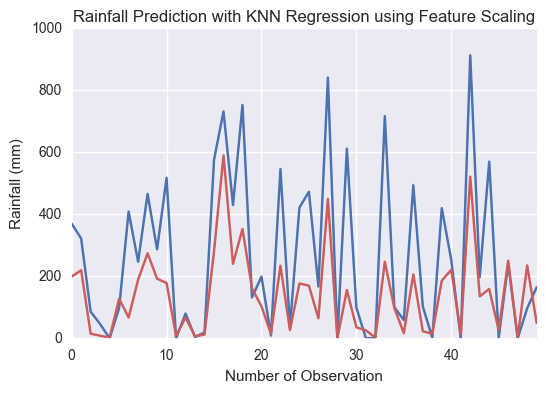

In [4]:
# Rainfall: 6.1
# KNN regression - 2
# with Feature Scaling

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import warnings; warnings.simplefilter('ignore') # Jupyter notebook warning message remove

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking careof missing data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

# Feature Scaling- MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = i)

    # Feature Scaling- MinMaxScaler
    
    X_train_n = scaler.fit_transform(X_train) # X_train_n = normalized
    X_test_n = scaler.fit_transform(X_test)
    y_train_n = scaler.fit_transform(y_train)
    y_test_n = scaler.fit_transform(y_test)
    
    neigh = KNeighborsRegressor(n_neighbors=8)
    neigh.fit(X_train_n,y_train_n)

    predicted = neigh.predict(X_test_n)
    #print("Prediction Result: ",predicted)
    print("i = ",i)
    print('R-squared test score: {:.3f}'.format(neigh.score(X_test_n,y_test_n))) # R-Squared test score


#Undo the scaling of X according to feature_range.    
X_train_d = scaler.inverse_transform(X_train_n) # X_train_d = dnormalized
X_test_d = scaler.inverse_transform(X_test_n)
y_train_d = scaler.inverse_transform(y_train_n)
y_test_d = scaler.inverse_transform(y_test_n)
predicted_d = scaler.inverse_transform(predicted)    
    
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.tsplot(y_test_d[0:50])
sns.tsplot(predicted_d[0:50],color="indianred")
plt.xlabel('Number of Observation')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction with KNN Regression using Feature Scaling')
plt.show()


 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

i = 1
R-squared test score: 0.678
i = 2
R-squared test score: 0.731
i = 3
R-squared test score: 0.688
i = 4
R-squared test score: 0.741
i = 5
R-squared test score: 0.763
i = 6
R-squared test score: 0.692
i = 7
R-squared test score: 0.693
i = 8
R-squared test score: 0.707
i = 9
R-squared test score: 0.739
i = 10
R-squared test score: 0.722
i = 11
R-squared test score: 0.732
i = 12
R-squared test score: 0.695
i = 13
R-squared test score: 0.726
i = 14
R-squared test score: 0.684
i = 15
R-squared test score: 0.656
i = 16
R-squared test score: 0.703
i = 17
R-squared test score: 0.719
i = 18
R-squared test score: 0.723
i = 19
R-squared test score: 0.689
i = 20
R-squared test score: 0.706
i = 21
R-squared test score: 0.717
i = 22
R-squared test score: 0.669
i = 23
R-squared test score: 0.757
i = 24
R-squared test score: 0.762
i = 25
R-squared te

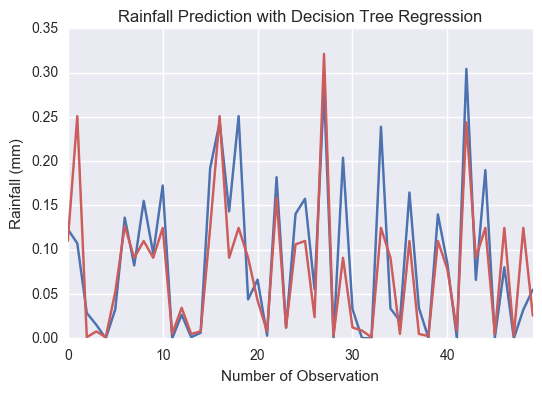

In [11]:
# Rainfall: 8.1
# Decision Tree Regression - 1

import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore') # Jupyter notebook warning message remove

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking careof missing data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

# Feature Scaling- MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split

from sklearn.tree import DecisionTreeRegressor
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = i)
    regressor = DecisionTreeRegressor(max_depth=6)
    regressor.fit(X_train,y_train)

    predicted = regressor.predict(X_test)
    #print("Prediction Result: ",predicted1)
    print('i =',i)
    print('R-squared test score: {:.3f}'.format(regressor.score(X_test,y_test))) # R-Squared test score

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.tsplot(y_test[0:50])
sns.tsplot(predicted[0:50],color="indianred")
plt.xlabel('Number of Observation')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction with Decision Tree Regression')
plt.show()


 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

i = 1
R-squared test score: 0.099
i = 2
R-squared test score: 0.369
i = 3
R-squared test score: 0.482
i = 4
R-squared test score: 0.503
i = 5
R-squared test score: 0.371
i = 6
R-squared test score: 0.516
i = 7
R-squared test score: 0.531
i = 8
R-squared test score: 0.563
i = 9
R-squared test score: 0.499
i = 10
R-squared test score: 0.498
i = 11
R-squared test score: 0.522
i = 12
R-squared test score: 0.607
i = 13
R-squared test score: 0.535
i = 14
R-squared test score: 0.665
i = 15
R-squared test score: -0.329
i = 16
R-squared test score: 0.291
i = 17
R-squared test score: 0.552
i = 18
R-squared test score: 0.458
i = 19
R-squared test score: 0.596
i = 20
R-squared test score: 0.616
i = 21
R-squared test score: 0.432
i = 22
R-squared test score: 0.596
i = 23
R-squared test score: 0.531
i = 24
R-squared test score: 0.440
i = 25
R-squared t

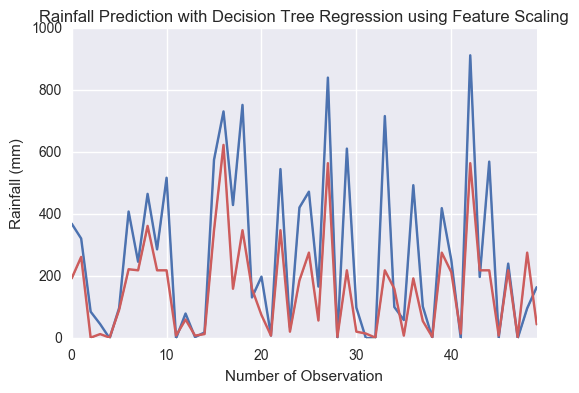

In [10]:
# Rainfall: 8.1
# Decision Tree Regression - 2
# with Feature Scaling

import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore') # Jupyter notebook warning message remove

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking careof missing data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

# Feature Scaling- MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split

from sklearn.tree import DecisionTreeRegressor
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = i)
    
    # Feature Scaling- MinMaxScaler
    X_train_n = scaler.fit_transform(X_train) # X_train_n = normalized
    X_test_n = scaler.fit_transform(X_test)
    y_train_n = scaler.fit_transform(y_train)
    y_test_n = scaler.fit_transform(y_test)
    
    regressor = DecisionTreeRegressor(max_depth=6)
    regressor.fit(X_train_n,y_train_n)

    predicted = regressor.predict(X_test_n)
    #print("Prediction Result: ",predicted1)
    print('i =',i)
    print('R-squared test score: {:.3f}'.format(regressor.score(X_test_n,y_test_n))) # R-Squared test score

#Undo the scaling of X according to feature_range.    
X_train_d = scaler.inverse_transform(X_train_n) # X_train_d = dnormalized
X_test_d = scaler.inverse_transform(X_test_n)
y_train_d = scaler.inverse_transform(y_train_n)
y_test_d = scaler.inverse_transform(y_test_n)
predicted_d = scaler.inverse_transform(predicted)
    
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.tsplot(y_test_d[0:50])
sns.tsplot(predicted_d[0:50],color="indianred")
plt.xlabel('Number of Observation')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction with Decision Tree Regression using Feature Scaling')
plt.show()


 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

i =  1
R-squared test score: 0.735
i =  2
R-squared test score: 0.783
i =  3
R-squared test score: 0.754
i =  4
R-squared test score: 0.785
i =  5
R-squared test score: 0.813
i =  6
R-squared test score: 0.747
i =  7
R-squared test score: 0.757
i =  8
R-squared test score: 0.768
i =  9
R-squared test score: 0.792
i =  10
R-squared test score: 0.800
i =  11
R-squared test score: 0.791
i =  12
R-squared test score: 0.742
i =  13
R-squared test score: 0.791
i =  14
R-squared test score: 0.752
i =  15
R-squared test score: 0.733
i =  16
R-squared test score: 0.758
i =  17
R-squared test score: 0.780
i =  18
R-squared test score: 0.779
i =  19
R-squared test score: 0.781
i =  20
R-squared test score: 0.783
i =  21
R-squared test score: 0.782
i =  22
R-squared test score: 0.751
i =  23
R-squared test score: 0.800
i =  24
R-squared test score: 0

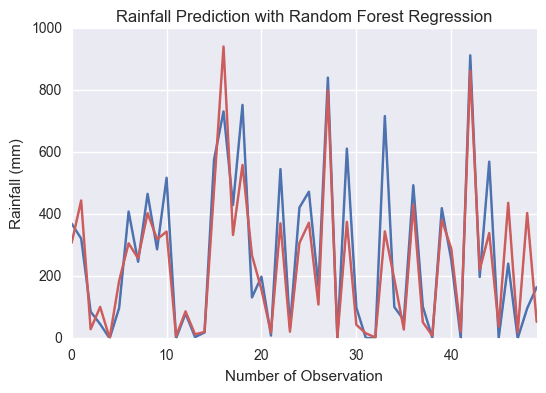

In [14]:
# 7.2
# Random Forest Regression- 1

import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore') # Jupyter notebook warning message remove

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking care of categorical variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 33)


from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, bootstrap=False)

for i in range(1,100):
    #regressor = RandomForestRegressor(max_depth=None, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = i)
    regressor = RandomForestRegressor(n_estimators=200, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, bootstrap=False)
    regressor.fit(X_train, y_train)

    predicted = regressor.predict(X_test)
    #print("Prediction Result: ",predicted1)
    print("i = ",i)

    print('R-squared test score: {:.3f}'.format(regressor.score(X_test,y_test))) # R-Squared test score

print("Actual=",y_test[0:6],"\n")
print("Predict=",predicted[0:6],"\n")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.tsplot(y_test[0:50])
sns.tsplot(predicted[0:50],color="indianred")
plt.xlabel('Number of Observation')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction with Random Forest Regression')
plt.show()


 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

i =  1
R-squared test score: 0.312
i =  2
R-squared test score: 0.417
i =  3
R-squared test score: 0.608
i =  4
R-squared test score: 0.535
i =  5
R-squared test score: 0.406
i =  6
R-squared test score: 0.589
i =  7
R-squared test score: 0.615
i =  8
R-squared test score: 0.585
i =  9
R-squared test score: 0.520
i =  10
R-squared test score: 0.505
i =  11
R-squared test score: 0.548
i =  12
R-squared test score: 0.705
i =  13
R-squared test score: 0.533
i =  14
R-squared test score: 0.722
i =  15
R-squared test score: -0.060
i =  16
R-squared test score: 0.375
i =  17
R-squared test score: 0.578
i =  18
R-squared test score: 0.481
i =  19
R-squared test score: 0.598
i =  20
R-squared test score: 0.623
i =  21
R-squared test score: 0.492
i =  22
R-squared test score: 0.660
i =  23
R-squared test score: 0.568
i =  24
R-squared test score: 

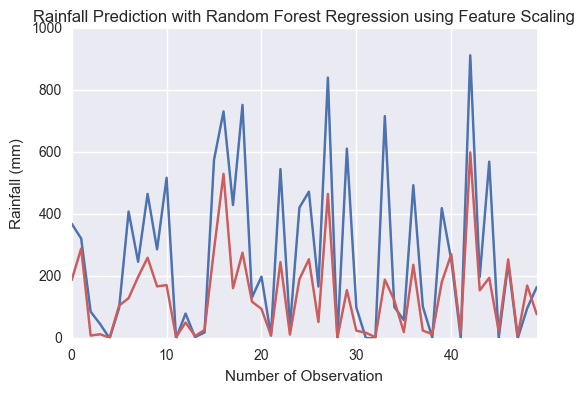

In [15]:
# 7.1
# Random Forest Regression- 2
# with Feature Scaling

import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore') # Jupyter notebook warning message remove

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking careof missing data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

# Feature Scaling- MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 33)


from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, bootstrap=False)

for i in range(1,100):
    #regressor = RandomForestRegressor(max_depth=None, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = i)
    
    # Feature Scaling- MinMaxScaler
    
    X_train_n = scaler.fit_transform(X_train)
    X_test_n = scaler.fit_transform(X_test)
    y_train_n = scaler.fit_transform(y_train)
    y_test_n = scaler.fit_transform(y_test)
    
    regressor = RandomForestRegressor(n_estimators=200, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, bootstrap=False)
    regressor.fit(X_train_n, y_train_n)

    predicted = regressor.predict(X_test_n)
    #print("Prediction Result: ",predicted)
    print("i = ",i)

    print('R-squared test score: {:.3f}'.format(regressor.score(X_test_n,y_test_n))) # R-Squared test score

#Undo the scaling of X according to feature_range.    
X_train_d = scaler.inverse_transform(X_train_n)
X_test_d = scaler.inverse_transform(X_test_n)
y_train_d = scaler.inverse_transform(y_train_n)
y_test_d = scaler.inverse_transform(y_test_n)
predicted_d = scaler.inverse_transform(predicted)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.tsplot(y_test_d[0:50])
sns.tsplot(predicted_d[0:50],color="indianred")
plt.xlabel('Number of Observation')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction with Random Forest Regression using Feature Scaling')
plt.show()


 [[0 1995 1 24.9 10.7]
 [0 1995 2 27.7 15.0]
 [0 1995 3 33.0 19.5]
 ..., 
 [31 2012 10 31.6 24.3]
 [31 2012 11 30.6 18.3]
 [31 2012 12 27.7 16.4]] 

i =  1
R-squared test score: 0.585
i =  2
R-squared test score: 0.631
i =  3
R-squared test score: 0.613
i =  4
R-squared test score: 0.627
i =  5
R-squared test score: 0.661
i =  6
R-squared test score: 0.604
i =  7
R-squared test score: 0.598
i =  8
R-squared test score: 0.647
i =  9
R-squared test score: 0.632
i =  10
R-squared test score: 0.653
i =  11
R-squared test score: 0.651
i =  12
R-squared test score: 0.603
i =  13
R-squared test score: 0.639
i =  14
R-squared test score: 0.630
i =  15
R-squared test score: 0.601
i =  16
R-squared test score: 0.609
i =  17
R-squared test score: 0.626
i =  18
R-squared test score: 0.637
i =  19
R-squared test score: 0.634
i =  20
R-squared test score: 0.639
i =  21
R-squared test score: 0.650
i =  22
R-squared test score: 0.611
i =  23
R-squared test score: 0.672
i =  24
R-squared test score: 0

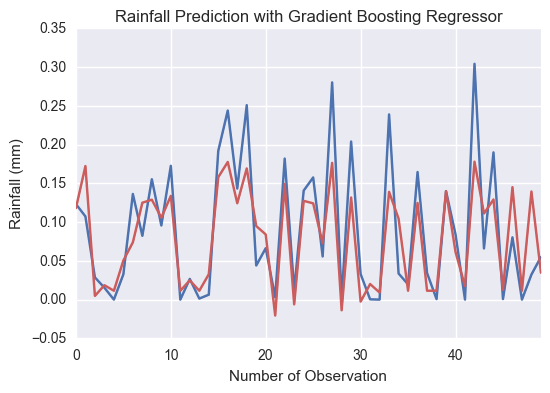

In [16]:
# Report a ata lekha lagbe na

# 8.1
# Gradient Boosting Regressor

import pandas as pd
import numpy as np

#importing the dataset
dataset = pd.read_csv('data/rainfall_bd_2.csv')

#result of independentvariable
X = dataset.iloc[:,0:5].values # considering all station name

#result of dependent variable
y = dataset.iloc[:,36].values

#taking care of categorical variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])
print("\n",X,"\n")

# Feature Scaling- MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

X = np.array(X)
y = np.array(y)

from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 33)


from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = i)
    est = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1,max_depth=1,loss='ls')
    est.fit(X_train, y_train)

    predicted1 = est.predict(X_test)
    #print("Prediction Result: ",predicted1)
    print("i = ",i)

    print('R-squared test score: {:.3f}'.format(est.score(X_test,y_test))) # R-Squared test score

print("Actual=",y_test[0:6],"\n")
print("Predict=",predicted1[0:6],"\n")

print(mean_squared_error(y_test, est.predict(X_test)))

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.tsplot(y_test[0:50])
sns.tsplot(predicted1[0:50],color="indianred")
plt.xlabel('Number of Observation')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction with Gradient Boosting Regressor')
plt.show()